# <font color='DarkSlateBlue'>Intro Data Analysis</font> 

## <font color='NavyBlue'>Titanic Data</font>

### <font color='Red'> Eu, mulher, jovem adulta, na 2º classe sobreviveria?</font>

In [1]:
#importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
import numpy as np


In [2]:
#Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import datasets, svm, model_selection, tree, preprocessing, metrics

In [3]:
filename = 'C:/Nanodegree/Intro_Data_Analys/titanic_data.csv'
titanic_df = pd.read_csv(filename, header=0)

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangler
Pontos focais:
- Idade
- Sexo
- Acompanhantes: SibSp + Parch
- Classe

Descrição dos campos:
- Embarked: Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)
- Parch: Número de pais e filhos a bordo
- Pclass: Classe que o passageiro embarcou (1 = 1º classe; 2 = 2º classe; 3 = 3º classe)
- Sex: Gênero feminino (female) ou male (masculino)
- Sibsp: Numero de irmãos e esposa a bordo
- Survived: 0 - Não sobreviveu e 1 = sobreviveu

In [5]:
# Verifica  o tipo dos dados criados
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Manipulando as variáveis

Acompanhantes

* As variáveis SibSp e Parch tem a mesma raiz de informação (total de acompanhantes), para facilitar a análise, será criada 
uma nova coluna Family com o total de acompanhantes. É possível que pessoas acompanhadas tenham maior probabilidade de não sobreviver porque tiveram que ajudar os familiares? Tendo toda a informação em uma só coluna facilitará a análise

In [6]:
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']

#### Valores nulos

* Primeiro passo é verificar se existem valores nulos e qual sua proporção deles por coluna

In [7]:
((len(titanic_df) - titanic_df.count()) / len(titanic_df)) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Family          0.000000
dtype: float64

**Decidindo o tratamento da Coluna Cabin**

In [8]:
titanic_df.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

* 77% da coluna é composta por valores nulos. Dos 204 valores existentes, 147 são únicos e os registros mais repetidos 
aparecem apenas 4 vezes. Como top foram listados os valores C23, C25, C27, todos eles são iniciados pela letra C, o que pode 
indicar a existência de um padrão na montagem do campo. Esta possibilidade não será investigada nesta análise, e o campo será 
excluído devido ao alto percentual de nulos.

**Decidindo o tratamento da Coluna Age**

In [9]:
titanic_df.Age.describe()

C:\Program Files (x86)\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

* A coluna é composta por 14% de valores nulos, como estou supondo que esta coluna é importante para análise dos dados, vou substituir os valores nulos pela média da coluna.

In [10]:
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())

A coluna AgeRange será criada para facilitar a análise da faixa etária sobrevivente. Apesar de ter 32 anos, expandirei a pesquisa para faixa etária para que a análise não fique tão pontual. 

In [82]:
# Descobre a faixa etária baseado na idade do passageiro(Titanic_df.Age)
def age_range(data):    
    if data >= 65:
        return 'Idoso'
    elif data >= 33:
        return 'Adulto'
    elif data >= 18:
        return 'Jovem Adulto'
    elif data >= 12:
        return 'Adolescente'
    else:
        return 'Crianca'    

In [83]:
# Chama a função age_range passando como o parametro a coluna Age e atribui o resultado a nova coluna AgeRange
titanic_df['AgeRange']= titanic_df.Age.apply(age_range) 

In [84]:
titanic_df.AgeRange.describe()

count              891
unique               5
top       Jovem Adulto
freq               512
Name: AgeRange, dtype: object

**Decidindo o tratamento das coluna Embarked, Ticket, PassengerId, Name**

In [14]:
# Embarked tem valores nulos
titanic_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

* A coluna Embarked demonstra o local em que o passageiro embarcou. Ela não será incluida na análise.

* PassengerId, Ticket, Embarked e Name não tem conteúdo significativo no contexto selecionado.

In [15]:
#Apaga as colunas
titanic_df.drop(['PassengerId','SibSp', 'Parch', 'Cabin','Embarked', 'Ticket','Name'], axis=1, inplace=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Family,AgeRange
0,0,3,male,22.0,7.2500,1,Young Adult
1,1,1,female,38.0,71.2833,1,Adult
2,1,3,female,26.0,7.9250,0,Young Adult
3,1,1,female,35.0,53.1000,1,Adult
4,0,3,male,35.0,8.0500,0,Adult


Será trabalhado com a relação da variavel Survived com Pclass, Sex, Age, Fare e Family.

## Sumário estatístico
Aplicada aos valores númericos

- count: Total de elementos não nulos
- mean: Média
- std: Desvio Padrão
- min: Maior valor da amostra
- max: Menor valor da amostra
- 25%: Quartil 1, corresponde a 25% da amostra
- 50%: Quartil 2 ou mediana da amostra
- 75%: Quartil 3, corresponde a % da amostra

In [16]:
titanic_df.describe()

,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.904602
std,0.486592,0.836071,13.002015,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,14.454200,0.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


**Observações:**

* Todas as linhas de todas as colunas estão preenchidas com 891 registros cada.
* A idade dos passageiros está entre 0.42 e 80 anos. 

* A média de Family é 0.9, dando a impressão de que a maior parte dos passageiros estava acompanhada. 
Confirmando essa informação:

In [17]:
((len(titanic_df.Family) - titanic_df[titanic_df['Family']>0].count()) / len(titanic_df.Family)) *100

Survived    60.26936
Pclass      60.26936
Sex         60.26936
Age         60.26936
Fare        60.26936
Family      60.26936
AgeRange    60.26936
dtype: float64

60% dos passageiros estavam desacompanhados. Investigando a diferença:

In [18]:
# Lista os valores únicos da quantidade de acompanhantes por passageiros
titanic_df.Family.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

Agrupa os dados de family e Survived, com o objetivo de descobrir se ha uma relação entre o número de acompanhantes  e a sobrevivência. 

In [19]:
acompanhante_sobrevivencia = titanic_df.groupby(['Family','Survived']).count()['Pclass']
acompanhante_sobrevivencia

Family  Survived
0       0           374
        1           163
1       0            72
        1            89
2       0            43
        1            59
3       0             8
        1            21
4       0            12
        1             3
5       0            19
        1             3
6       0             8
        1             4
7       0             6
10      0             7
Name: Pclass, dtype: int64

In [20]:
titanic_df.Family.sum()

806L

O total da soma de familiares é quase similar ao total de valores da coluna Family. Quando calculado a média, fica a impressão de a maioria dos passageiros esta acompanhado.

Visualizando o mapa da distribuição dos sobreviventes por número de acompanhantes

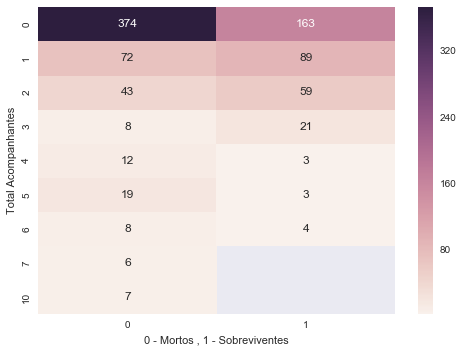

In [21]:
sb.heatmap(acompanhante_sobrevivencia.unstack(), annot=True, fmt='g')
plt.xlabel('0 - Mortos , 1 - Sobreviventes')
plt.ylabel('Total Acompanhantes')

Através do gráfico é possível confirmar que a maior parte dos passageiros estava desacompanhando. Se a análise se baseasse apenas nestas duas colunas, sem considerar classe, sexo e o valor da passagem, estar desacompanhado comporia o grupo com menor probabilidade de sobreviver.

* Fare tem duas questões que precisa ser avaliada. A primeira é o preço máximo do ticket é 512 sendo que a o valor médio 32. Vou aprofundar na análise desse dados porque estes outliers podem interferir no resultado. A segunda é que o valor mínimo é 0. Pode ser, por exemplo, porque alguns tickets foram distribuidos de graça ou eram crianças. Isto será verificado.

Questão 1: O maior valor está distante dos outros valores? 

In [22]:
# Ordena os dados em ordem descente para verificar se existem muitos valores altos como o max=512.
titanic_df.Fare.sort_values(ascending=False).head(30)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
88     263.0000
27     263.0000
311    262.3750
742    262.3750
299    247.5208
118    247.5208
716    227.5250
557    227.5250
380    227.5250
700    227.5250
527    221.7792
377    211.5000
689    211.3375
730    211.3375
779    211.3375
318    164.8667
856    164.8667
268    153.4625
332    153.4625
609    153.4625
297    151.5500
305    151.5500
498    151.5500
708    151.5500
31     146.5208
Name: Fare, dtype: float64

O maior valor (512.3292) está muito distante do segundo maior valor (263.0000). Os outros valores são bem aproximados um dos outros. A menos que existam 3 cabines de luxo com uma tarifa exorbitante, o que eu não acredito, esses dados estão falhos. Para os passageiros com a passagem igual ao maior valor, vou atribuir o segundo maior valor.  

In [23]:
# Lista os 10 maiores valores de Fare, mas a lista tem valores repetidos, então filtra somente unicos(.unique) e
# retorna a segunda linha [1], porque a primeira é o Max. 
second_max_fare = titanic_df.Fare.nlargest(10).unique()[1]
second_max_fare

263.0

In [24]:
# Atribui o segundo valor mais alto da coluna(second_max_fare) onde Fare é igual ao valor máximo da coluna
titanic_df.Fare = titanic_df.Fare.apply(lambda x: second_max_fare if x==titanic_df.Fare.max() else x)

In [25]:
titanic_df.Fare.max()

263.0

Questão 2: Os valores zerados são de crianças ou idosos? Eles tem algum fator em comum?

In [26]:
titanic_df[titanic_df['Fare']==0]

,Survived,Pclass,Sex,Age,Fare,Family,AgeRange
179,0,3,male,36.000000,0.0,0,Adult
263,0,1,male,40.000000,0.0,0,Adult
271,1,3,male,25.000000,0.0,0,Young Adult
277,0,2,male,29.699118,0.0,0,Young Adult
302,0,3,male,19.000000,0.0,0,Young Adult
413,0,2,male,29.699118,0.0,0,Young Adult
466,0,2,male,29.699118,0.0,0,Young Adult
481,0,2,male,29.699118,0.0,0,Young Adult
597,0,3,male,49.000000,0.0,0,Adult
633,0,1,male,29.699118,0.0,0,Young Adult


A teoria de que podiam ser ingressos gratuitos por causa da idade não se confirmou. No grupo não tem crianças nem idosos. Em comum os dados tem o gênero masculino e não estavam acompanhados. Acredito que seja mais uma falha nos dados e para este caso vou atribuir o valor médio da coluna Fare.

In [27]:
# Atribui o segundo valor mais alto da coluna onde Fare é igual ao valor máximo da coluna
titanic_df.Fare = titanic_df.Fare.apply(lambda x: titanic_df.Fare.mean() if x==0 else x)

In [28]:
titanic_df.Fare.describe()

count    891.000000
mean      31.892741
std       43.062619
min        4.012500
25%        7.925000
50%       15.100000
75%       31.364716
max      263.000000
Name: Fare, dtype: float64

Como pode ser constatado, o valor mínimo (min) passou a ser 4.01 e o máximo(max) 263.

### Correlação de Pearson
Qual a corelação das variáveis como fator sobrevivência? O método pearson (.corr) foi utilizado para demonstrar a 
dependencia entre elas. O valor pode variar entre 0 e 1, tanto negativo quanto positivo.
Espera-se um grau de correlação superior a 0.5 para demonstrar uma correlação de moderada a muito forte.
    

In [29]:
titanic_df.corr(method='pearson', min_periods=1)

,Survived,Pclass,Age,Fare,Family
Survived,1.000000,-0.338481,-0.069809,0.264212,0.016639
Pclass,-0.338481,1.000000,-0.331339,-0.609074,0.065997
Age,-0.069809,-0.331339,1.000000,0.099607,-0.248512
Fare,0.264212,-0.609074,0.099607,1.000000,0.250601
Family,0.016639,0.065997,-0.248512,0.250601,1.000000


Como a coluna Sex não é númerica, não foi calculada a correlação para ela. Acredito que ela tenha uma correlação com survived, então vou transforma-la em número, numa coluna adicional, para mensurar a correlação.

In [30]:
titanic_df['SexInt'] = map(int, titanic_df.Sex == 'male')

In [31]:
correlation_df = titanic_df.corr(method='pearson', min_periods=1).abs()
correlation_df

,Survived,Pclass,Age,Fare,Family,SexInt
Survived,1.000000,0.338481,0.069809,0.264212,0.016639,0.543351
Pclass,0.338481,1.000000,0.331339,0.609074,0.065997,0.131900
Age,0.069809,0.331339,1.000000,0.099607,0.248512,0.084153
Fare,0.264212,0.609074,0.099607,1.000000,0.250601,0.202137
Family,0.016639,0.065997,0.248512,0.250601,1.000000,0.200988
SexInt,0.543351,0.131900,0.084153,0.202137,0.200988,1.000000


Foi importante adicionar a SexInt. As variáveis Sex(SexInt) e Pclass são as mais relacionadas com Survived. Faz sentido se pensarmos que a localização da cabine fez diferença e que as mulheres e criancas tem prioridade numa situação de emergencia.
Pclass e Fare também estão correlacionadas, principalmente porque o tipo/classe cabine são fatores para composição dos valores de passagens.

**Classificação do resultado - correlação _p_**

In [32]:
correlation_df.unstack().sort_values(ascending=False)

SexInt    SexInt      1.000000
Family    Family      1.000000
Pclass    Pclass      1.000000
Age       Age         1.000000
Fare      Fare        1.000000
Survived  Survived    1.000000
Fare      Pclass      0.609074
Pclass    Fare        0.609074
Survived  SexInt      0.543351
SexInt    Survived    0.543351
Pclass    Survived    0.338481
Survived  Pclass      0.338481
Pclass    Age         0.331339
Age       Pclass      0.331339
Fare      Survived    0.264212
Survived  Fare        0.264212
Fare      Family      0.250601
Family    Fare        0.250601
Age       Family      0.248512
Family    Age         0.248512
SexInt    Fare        0.202137
Fare      SexInt      0.202137
SexInt    Family      0.200988
Family    SexInt      0.200988
SexInt    Pclass      0.131900
Pclass    SexInt      0.131900
Fare      Age         0.099607
Age       Fare        0.099607
SexInt    Age         0.084153
Age       SexInt      0.084153
          Survived    0.069809
Survived  Age         0.069809
Pclass  

=> Correlação moderada _p_>0.5
* Survived x SexInt
* Pclass   x Fare

=> Correlação fraca _p_ >0.3
* Pclass   x Survived
* Pclass   x Age

=> Correlação desprezível
* Survived x Fare    
* Family   x Fare
* Family   x Age
* Fare     x SexInt 
* Family   x SexInt 
* Pclass   x SexInt     
* Age      x Fare       
* Age      x SexInt  
* Survived x Age 
* Pclass   x Family 
* Survived x Family 

A correlação mais forte do grupo, Pclasse e Fare, pode ser justificada pelo fato de que o preço das passagens geralmente é definido por fatores como classe escolhida.

# Visualizando os dados

Uma visão geral de todas as colunas. Os dados estão agrupados em 0 -mortos e 1 - sobreviventes  

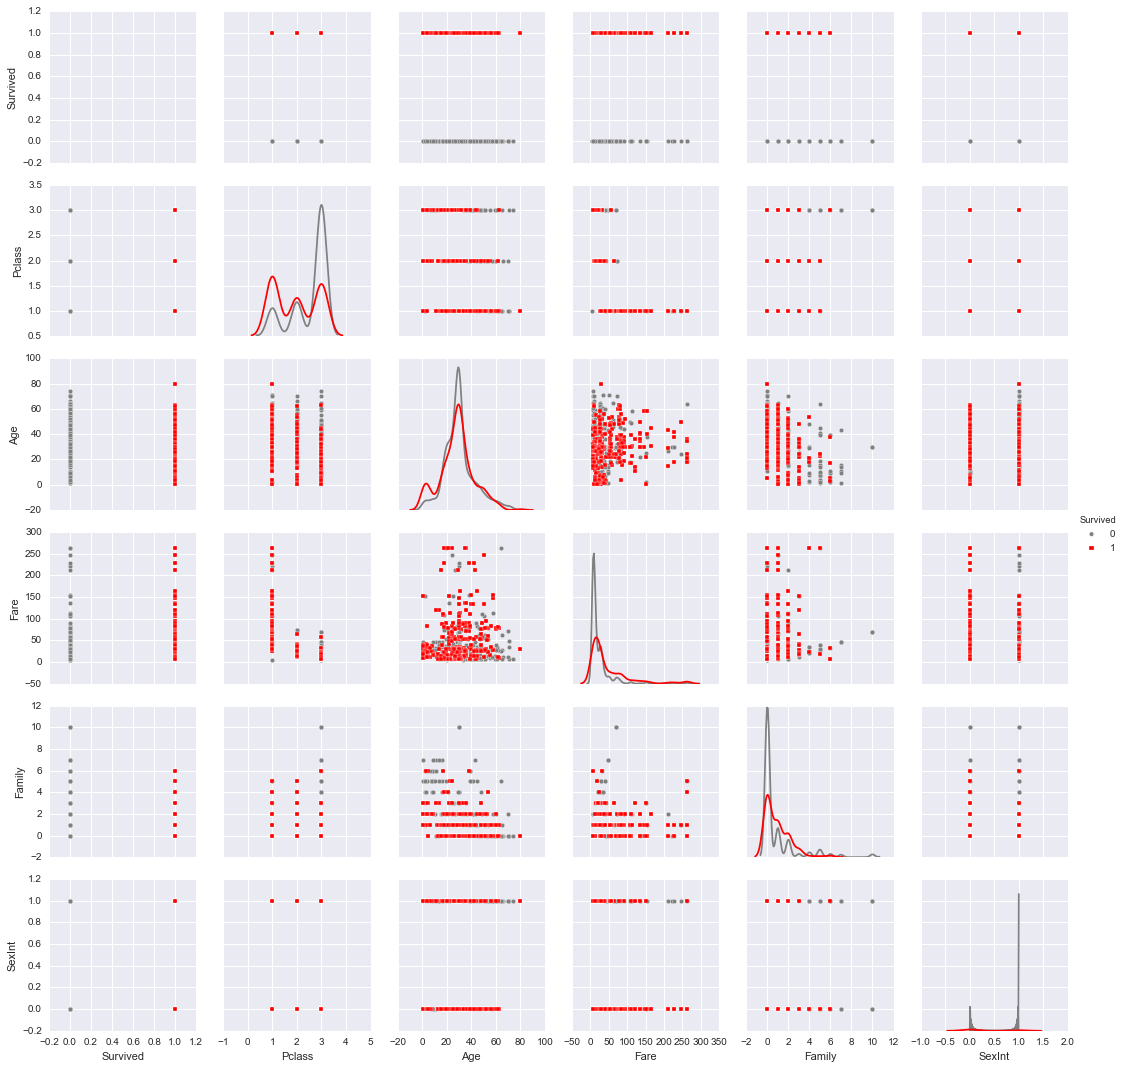

In [33]:
# Visão geral de todas as variáveis com a ajuda do pairplot(). 
sb.pairplot(titanic_df, hue='Survived', diag_kind='kde', size=2.5, markers=['o','s'], palette=['gray','red'])
# kind='reg'

Esta visualização geral auxilia na escolha de quais dados devem ser selecionados para uma exibição mais detalhada. Por exemplo, em SexInt está claro que mais homens morreram no Titanic. Na classe pode ser percebido um maior volume de mortos na 3º classe. 

### Visualizando Age

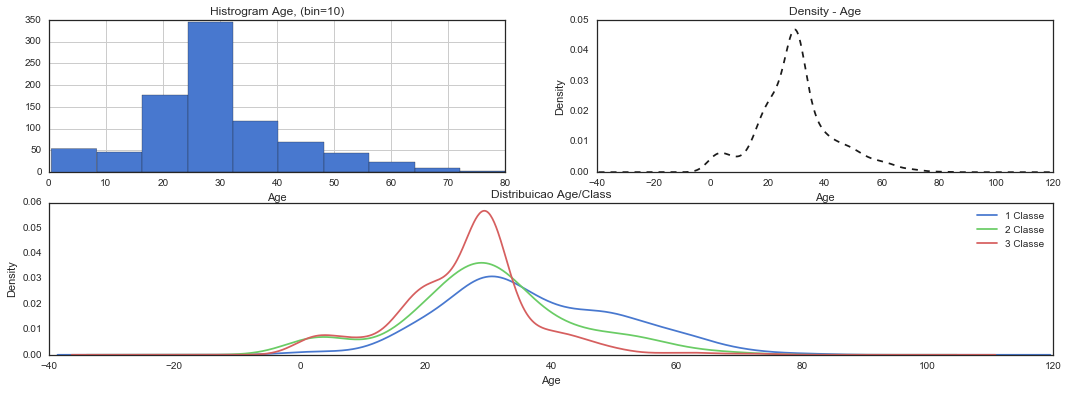

In [38]:
fig = plt.figure(figsize=(18,6), dpi=1600) 

# criando o subplot1 
ax1 = plt.subplot(2,2,1)
#Histogram da coluna Age
titanic_df.Age.hist(bins=10) 
#Definindo o label de x - Age
plt.xlabel("Age")
#Definindo o titulo do grafico
plt.title("Histrogram Age, (bin=10)")    

# criando o subplot2 
ax2 = plt.subplot(2,2,2)
#Plotando o grafico de densidade da coluna Age
titanic_df['Age'].plot(kind='kde', style='k--')
#Definindo o label do eixo y
plt.ylabel("Density")
#Definindo o label do eixo de x
plt.xlabel("Age")
#Definindo o titulo do grafico
plt.title("Densidade - Age")

# criando o subplot3
ax3 = plt.subplot(2,2,(3,4))
#plotando a densidade por classe
titanic_df.groupby('Pclass').Age.plot.kde()
#Definindo o label do eixo de x
plt.xlabel("Age")  
#Definindo o titulo do grafico
plt.title("Distribuicao Age/Class")
#Definindo a legenda
plt.legend(('1 Classe', '2 Classe','3 Classe'),loc='best') 

- A maior parte dos passageiros tem entre 20 e 40 anos.
- A 3º classe tem a maioria dos passageiros jovens e a 1º tem uma distribuição mais uniforme das idades, inclusive com a maior parte dos passageiros idosos.
- A distribuição do histograma da idade é normal.

Foi criada a coluna AgeRange com a classificação dos passageiros por faixa etária. Fica mais interpretar os dados incluindo-os em grupo.

[<matplotlib.text.Text at 0x1835b240>, <matplotlib.text.Text at 0x15cb1438>]

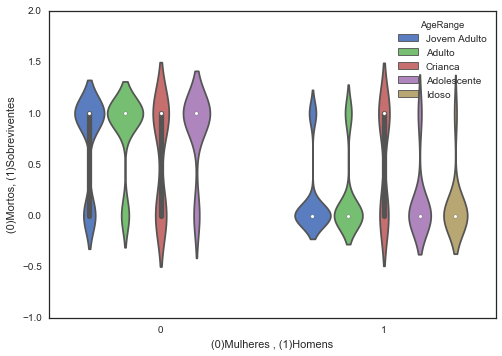

In [85]:
ax = sb.violinplot(data=titanic_df, x='SexInt', y='Survived', hue='AgeRange')
ax.set(xlabel='(0)Mulheres , (1)Homens', ylabel='(0)Mortos, (1)Sobreviventes')

No gráfico acima é bem nítido que a maioria das mulheres sobreviveu independente da faixa etaria. A maior parte dos homens morreu, inclusive os idosos. Tanto no grupo de homens e mulheres o volume de crianças sobreviventes é similar ao de mortos. Médias para o grupo Faixa Etária e Gênero.

In [96]:
faixa_etaria_genero = titanic_df.groupby(['AgeRange','Sex']).mean()
faixa_etaria_genero

Survived    Pclass        Age       Fare    Family  \
AgeRange     Sex                                                          
Adolescente  female  0.826087  2.217391  15.413043  39.497470  1.130435   
             male    0.136364  2.818182  15.909091  20.670082  1.500000   
Adulto       female  0.824176  1.670330  43.285714  61.367536  1.263736   
             male    0.182927  1.981707  43.643293  32.306215  0.512195   
Crianca      female  0.593750  2.687500   4.796875  27.956378  3.031250   
             male    0.555556  2.583333   4.546389  35.282292  3.555556   
Idoso        male    0.090909  1.727273  69.772727  28.905691  0.272727   
Jovem Adulto female  0.714286  2.315476  26.268174  37.677630  1.095238   
             male    0.159884  2.558140  26.637182  21.389572  0.395349   

                     SexInt  
AgeRange     Sex             
Adolescente  female     0.0  
             male       1.0  
Adulto       female     0.0  
             male       1.0  
Crianca      female     0.0  
             male       1.0  
Idoso        male       1.0  
Jovem Adulto female     0.0  
             male       1.0

In [106]:
faixa_etaria_genero.loc[['Jovem Adulto', 'Female']]

Survived    Pclass        Age       Fare    Family  \
AgeRange     Sex                                                          
Jovem Adulto female  0.714286  2.315476  26.268174  37.677630  1.095238   
             male    0.159884  2.558140  26.637182  21.389572  0.395349   

                     SexInt  
AgeRange     Sex             
Jovem Adulto female     0.0  
             male       1.0

In [101]:
faixa_etaria_genero.index.get_level_values(0)

Index([u'Adolescente', u'Adolescente', u'Adulto', u'Adulto', u'Crianca',
       u'Crianca', u'Idoso', u'Jovem Adulto', u'Jovem Adulto'],
      dtype='object', name=u'AgeRange')

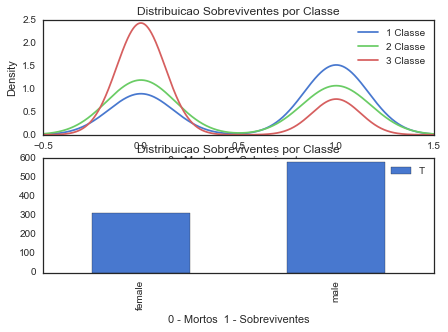

In [35]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
# tentar subplot com sb
sb.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.despine(left=True)

# Cria o subplot1 
ax1 = plt.subplot(3,1,1)
# Imprime gráfico com a densidade de sobreviventes por classe
titanic_df.groupby('Pclass').Survived.plot.kde()

# Define o label do eixo de x
plt.xlabel("0 - Mortos  1 - Sobreviventes")
# Define o título do gráfico
plt.title("Distribuicao Sobreviventes por Classe")
# Define a legenda
plt.legend(('1 Classe', '2 Classe','3 Classe'),loc='best') 

# Cria o subplot2 
ax2 = plt.subplot(3,1,2)
# Imprime gráfico com a densidade de sobreviventes por classe
#titanic_df.groupby('Survived').Sex.plot.kde()
titanic_df.groupby('Sex').count()['Survived'].plot.bar()
# Define o label do eixo de x
plt.xlabel("0 - Mortos  1 - Sobreviventes")
# Define o título do gráfico
plt.title("Distribuicao Sobreviventes por Classe")
# Define a legenda
plt.legend(('Total'),loc='best') 

In [ ]:
# criando o subplot3
#ax3 = plt.subplot(3,1,3)
# Cria série com os dados de todos os sobreviventes
sobreviventes = titanic_df[titanic_df['Survived']==1]

# Para os sobreviventes, calcula a média da idade por classe e gênero  
#sobreviventes.groupby(['Pclass','Sex']).mean()['Age'].plot.bar()
sb.factorplot(x="Sex", y="Age", hue="Pclass",
               col="Pclass", data=titanic_df, kind="box", size=4, aspect=.5)

# Define configurações do grafico ax2
plt.xlabel("Classe/Genero")
plt.ylabel('Idade')
#plt.title("Idade media dos sobreviventes por classe/genero")   
##plt.legend('Media_Idade', loc='best') 



In [34]:
grouped_yes

NameError: name 'grouped_yes' is not defined

### Com os dados preparados, começa a pesquisa para descobrir se uma mulher de 32 anos está na faixa média dos sobreviventes

As mulheres na 2º classe que sobreviveram tinham uma media de idade de 28 anos. 
Mas a media pode ter sido influenciada por algum outlier
Quantas mulheres de 32 sobreviveram? qual a classe?

In [ ]:
#Pesquisando por mulheres com 32 anos idependente de ter sobrevivido ou da classe
titanic_df[(titanic_df.Age==32) &
          (titanic_df.Sex == 0 )]

A estatistica está a meu favor:
- 2 das 3 (66%) mulheres de 32 anos no Titanic sobreviveram
- A única mulher de 32 anos na segunda classe sobreviveu =)

NameError: name 'survived_yes' is not defined

Imprime o gráfico com o std de cada idade, destacando 32 anos

In [ ]:
#Imprime scatter plot do std/Age
plt.scatter(titanic_std.Age, titanic_std.index, color='grey' )
plt.scatter(std_32, 0, color='red' )

#Configura gráfico
plt.xlabel("Id")
plt.ylabel('STD - Idade')
plt.title("Distribuicao do std/Age - sobreviventes")   
plt.legend(('Passageiros', 'Eu'),loc='best') 

Conforme visto através do método .describe(), existem outliers. 
Se existem outliers, qual a mediana das mulheres sobreviventes sobreviventes da 2º classe?

In [ ]:
#Pesquisa a mediana para registros com as características: Mulhere, na 2º classe, com 32 anos e que tenha sobrevivido
titanic_df[(titanic_df.Age==32) &
          (titanic_df.Sex == 0) &
          (titanic_df.Pclass == 2)&
          (titanic_df.Survived == 1)].median()

## <font color='Red'>Sim, eu teria sobrevivido.</font>

## Prevendo o resultado

In [ ]:
aux_df = titanic_df.copy()
#X recebe todos os valores do dataset menos a coluna Survived que será usada na comparação y
X = aux_df.drop(['Survived'], axis=1).values
#y recebe os valores da coluna Survived
y = aux_df['Survived'].values

#Divide as matrizes em teste e treino
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [ ]:
decision_tree = tree.DecisionTreeClassifier(max_depth=10)
#cria a arvore de decisão 
decision_tree.fit(X_train, y_train)

In [ ]:
 # Acurácia média dos dados de teste
decision_tree.score (X_test, y_test)

Percentual de acurácia da árvore de decisão: 85%

In [ ]:
#Gera a representação GraphViz da decision tree. O dado é gravado no arquivo titanic_tree.dot
#Os dados podem ser visualizados graficamente em http://www.webgraphviz.com/
tree.export_graphviz(decision_tree, out_file='titanic_tree.dot')

O arquivo 'titanic_tree.dot' está no github: https://github.com/liebycardoso/Intro_Data_Analysis

A fim de facilitar a visualização, foi gerado a representação GraphViz da decision tree com max_depth=2. Nos testes foi utilizado max_depth=10.   

![alt text](Tree_depth2.jpg "tree")

In [ ]:
#cria o objeto Random Forest
random_forest = RandomForestClassifier(n_estimators=100,oob_score=True)
#Treina o modelo de dados
random_forest.fit(X_train, y_train)

#Prediz o resultado
Y_pred = random_forest.predict(X_test)

In [ ]:
#Verifica a precisao do modelo.
random_forest.score(X_train, y_train)

Neste caso é possível prever a sobrevivência com 98% de precisao

In [ ]:
#Acuracia do resultado do modelo.82 da variável dependente pode ser explicada pelos features
random_forest.oob_score_

De acordo com o modelo utilizado, ranking de contribuição das colunas no resultado. 

In [ ]:
feat_import = pd.Series(random_forest.feature_importances_, index=aux_df.drop(['Survived'], axis=1).columns)
feat_import.sort_values()
feat_import

### BIBLIOGRAFIA

- Wes McKinney; Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython

Sites consultados:
- http://blog.socialcops.com/engineering/machine-learning-python
- http://developers.hekima.com/machine%20learning/python/2016/05/17/churn-prediction/
- http://hamelg.blogspot.com.br/2015/11/python-for-data-analysis-part-14.html
- http://nbviewer.jupyter.org/github/agconti/US_Dollar_Vehicle_Currency/blob/master/US_Dollar_Vehicle_Currency.ipynb
- http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- http://stackoverflow.com/questions/36288352/how-to-get-pandas-kde-density-with-horizontal-orientation
- http://work.caltech.edu/library/014.html
- http://work.caltech.edu/library/index.html
- http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
- http://www.reshamsarkar.com/projects/2016/3/30/titanic-trauma-data-cleaning-and-munging
- http://www.ultravioletanalytics.com/2014/11/03/kaggle-titanic-competition-part-ii-missing-values/
- https://github.com/agconti/kaggle-titanic/blob/master/Titanic.ipynb
- https://github.com/justmarkham/scikit-learn-videos
- https://www.dataquest.io/mission/3/list-operations
- https://www.kaggle.com/c/titanic
- https://www.youtube.com/watch?v=0GrciaGYzV0


In [ ]:
np.sqrt(metrics.mean_squared_erro(y_test, y_pred))